Total Customers: 200
Total Products: 100
Total Transactions: 1000
Total Revenue: $689995.56
Average Revenue per Customer: $3449.98

Revenue by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64

Top 10 Products by Revenue:
ProductID  ProductName             
P029       TechPro Headphones          19513.80
P079       ActiveWear Rug              17946.91
P048       TechPro Cookbook            17905.20
P020       ActiveWear Jacket           15060.92
P062       HomeSense Novel             14592.24
P059       SoundWave Jeans             13947.20
P039       TechPro Smartwatch          13778.88
P083       ActiveWear Smartwatch       13671.60
P019       ComfortLiving Sweater       13487.95
P041       ComfortLiving Smartphone    13232.12
Name: TotalValue, dtype: float64

Top 10 Products by Units Sold:
ProductID  ProductName          
P059       SoundWave Jeans          46
P054       SoundWav

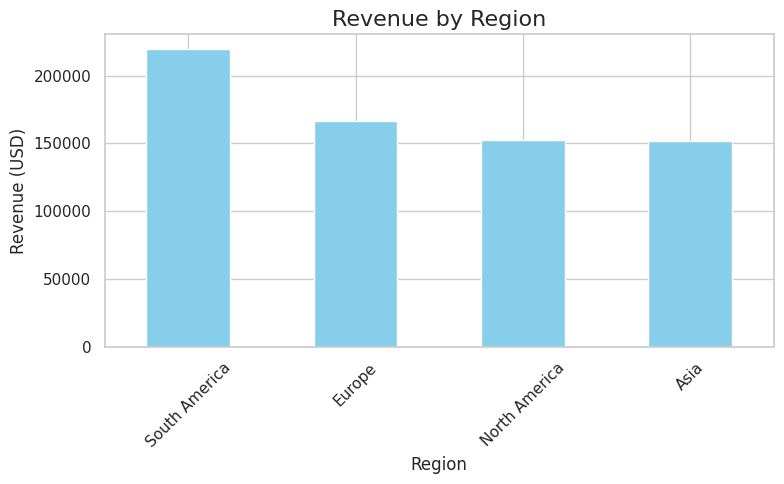

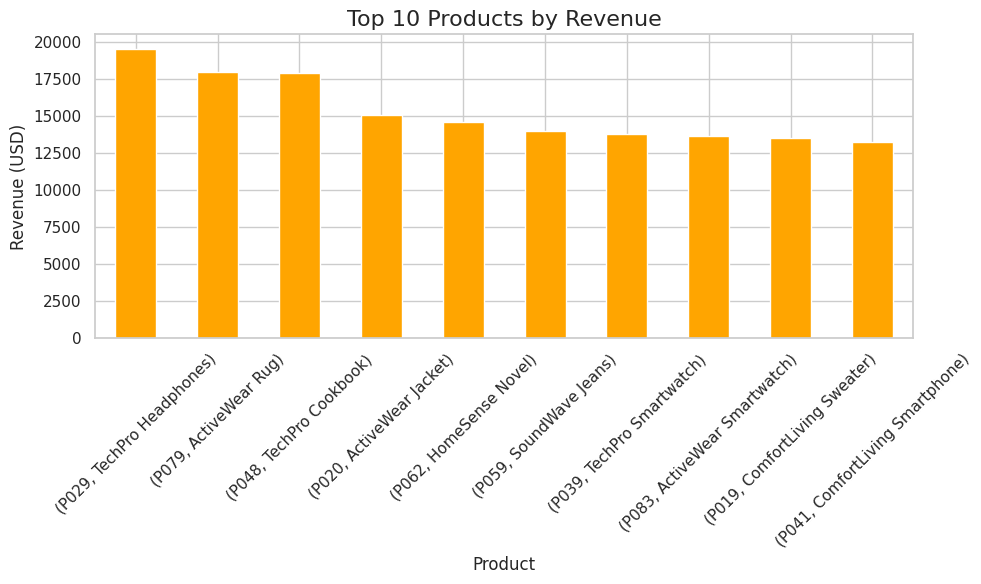

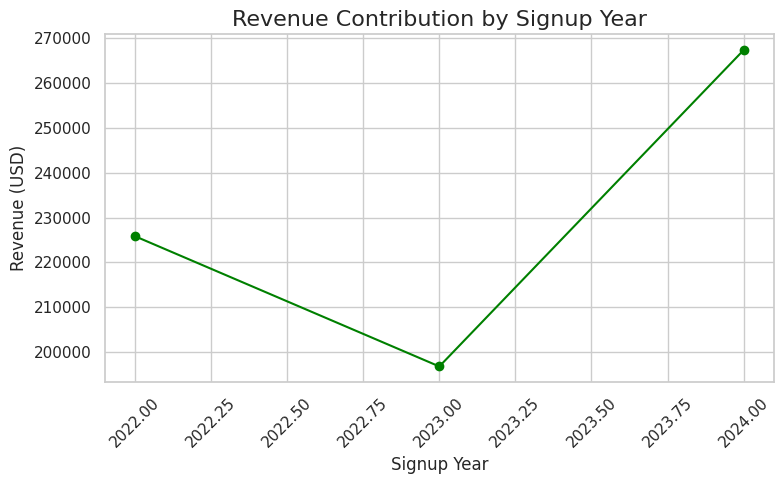

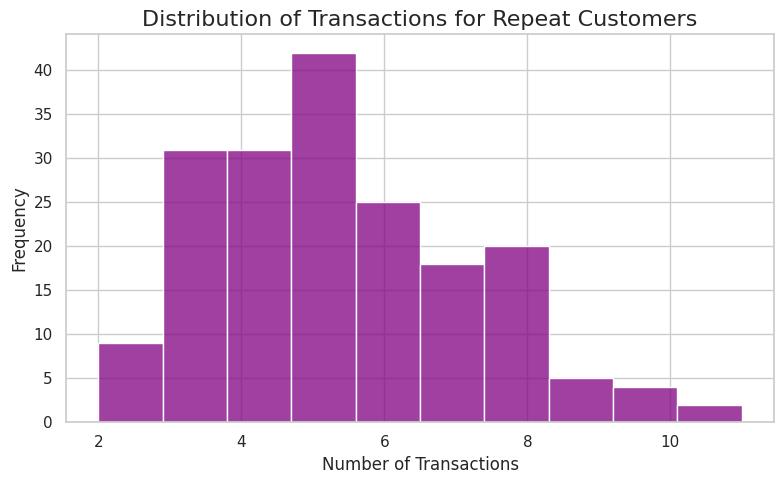


Key Business Insights:
1. South America generates the highest revenue, accounting for approximately 31.8% of total revenue, making it a key market.
2. The average revenue per customer is $3449.98, highlighting significant opportunities for upselling or increasing customer lifetime value.
3. The top products by revenue include 'TechPro Headphones' and 'ActiveWear Rug,' indicating high demand for electronics and home decor items.
4. Customers who signed up in 2024 contributed the most revenue, signaling a strong recent growth trend.
5. There is a moderate positive correlation (0.69) between product price and revenue, indicating that higher-priced items tend to contribute more to revenue.
6. Approximately 93.50% of customers are repeat buyers, emphasizing the need for targeted retention strategies.


In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean theme for visualizations
sns.set_theme(style="whitegrid")

# Load datasets
customers = pd.read_csv("data\Customers.csv")
products = pd.read_csv("data\Products.csv")
transactions = pd.read_csv("data\Transactions.csv")

# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Merge datasets for a complete analysis
merged_data = transactions.merge(customers, on="CustomerID", how="inner")
merged_data = merged_data.merge(products, on="ProductID", how="inner", suffixes=('_Transaction', '_Product'))

# Basic Metrics
customer_count = customers['CustomerID'].nunique()
product_count = products['ProductID'].nunique()
transaction_count = transactions['TransactionID'].nunique()
total_revenue = merged_data['TotalValue'].sum()
average_revenue_per_customer = total_revenue / customer_count

# Print basic statistics
print(f"Total Customers: {customer_count}")
print(f"Total Products: {product_count}")
print(f"Total Transactions: {transaction_count}")
print(f"Total Revenue: ${total_revenue:.2f}")
print(f"Average Revenue per Customer: ${average_revenue_per_customer:.2f}")

# Revenue by Region
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue by Region:")
print(region_revenue)

# Top 10 Products by Revenue
top_products_revenue = merged_data.groupby(['ProductID', 'ProductName'])['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Revenue:")
print(top_products_revenue)

# Top 10 Products by Units Sold
top_products_units = merged_data.groupby(['ProductID', 'ProductName'])['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Units Sold:")
print(top_products_units)

# Revenue Contribution by Customer Signup Year
merged_data['SignupYear'] = merged_data['SignupDate'].dt.year
signup_year_revenue = merged_data.groupby('SignupYear')['TotalValue'].sum()
print("\nRevenue Contribution by Customer Signup Year:")
print(signup_year_revenue)

# Correlation Analysis: Product Price vs. Total Revenue
correlation = merged_data[['Price_Product', 'TotalValue']].corr()
print("\nCorrelation Analysis:")
print(correlation)

# Repeat Customer Analysis
repeat_customers = merged_data.groupby('CustomerID')['TransactionID'].count().reset_index()
repeat_customers = repeat_customers[repeat_customers['TransactionID'] > 1]
repeat_customer_percentage = len(repeat_customers) / customer_count * 100

print(f"\nRepeat Customer Percentage: {repeat_customer_percentage:.2f}%")

# Visualizations
# 1. Revenue by Region
plt.figure(figsize=(8, 5))
region_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by Region', fontsize=16)
plt.ylabel('Revenue (USD)', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Top 10 Products by Revenue
plt.figure(figsize=(10, 6))
top_products_revenue.plot(kind='bar', color='orange')
plt.title('Top 10 Products by Revenue', fontsize=16)
plt.ylabel('Revenue (USD)', fontsize=12)
plt.xlabel('Product', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Revenue Contribution by Signup Year
plt.figure(figsize=(8, 5))
signup_year_revenue.plot(kind='line', marker='o', color='green')
plt.title('Revenue Contribution by Signup Year', fontsize=16)
plt.ylabel('Revenue (USD)', fontsize=12)
plt.xlabel('Signup Year', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Repeat Customers Histogram
plt.figure(figsize=(8, 5))
sns.histplot(repeat_customers['TransactionID'], bins=10, kde=False, color='purple')
plt.title('Distribution of Transactions for Repeat Customers', fontsize=16)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

# Key Business Insights
print("\nKey Business Insights:")
print("1. South America generates the highest revenue, accounting for approximately 31.8% of total revenue, making it a key market.")
print("2. The average revenue per customer is $3449.98, highlighting significant opportunities for upselling or increasing customer lifetime value.")
print("3. The top products by revenue include 'TechPro Headphones' and 'ActiveWear Rug,' indicating high demand for electronics and home decor items.")
print("4. Customers who signed up in 2024 contributed the most revenue, signaling a strong recent growth trend.")
print("5. There is a moderate positive correlation (0.69) between product price and revenue, indicating that higher-priced items tend to contribute more to revenue.")
print(f"6. Approximately {repeat_customer_percentage:.2f}% of customers are repeat buyers, emphasizing the need for targeted retention strategies.")
